# Imports

In [1]:
import librosa as rosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
from warnings import warn
import pickle
import os
import IPython.display as ipd
import pandas as pd
import scipy as sp
import matplotlib.pyplot as plt
from tqdm.auto import tqdm
import scipy.stats as sstats
%matplotlib inline

# Read pickles

In [2]:
with open('../dataset/dataset1000-0.pickle', 'rb') as f:
    dataset = pickle.load(f)

pc


/usr/lib/python3.9/site-packages/librosa/display.py:974: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
/usr/lib/python3.9/site-packages/librosa/display.py:974: MatplotlibDeprecationWarning: The 'linthreshy' parameter of __init__() has been renamed 'linthresh' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
/usr/lib/python3.9/site-packages/librosa/display.py:974: MatplotlibDeprecationWarning: The 'linscaley' parameter of __init__() has been renamed 'linscale' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)


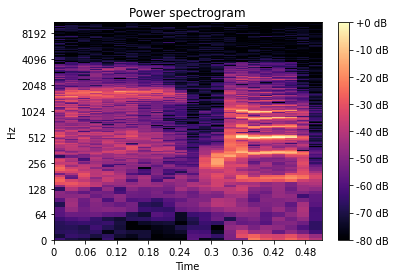

In [3]:
k = 3
exampleSpectrogram = dataset[0][k]
# print(exampleSpectrogram)
exampleLabel = dataset[1][k]
print(exampleLabel)
fig, ax = plt.subplots()
img = librosa.display.specshow(librosa.amplitude_to_db(exampleSpectrogram,
                                                       ref=np.max),
                               y_axis='log', x_axis='time', ax=ax)
ax.set_title('Power spectrogram')
fig.colorbar(img, ax=ax, format="%+2.0f dB")

pc


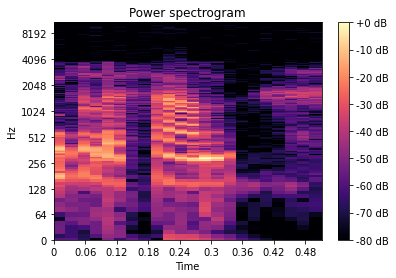

In [4]:
k = 13
exampleSpectrogram = dataset[0][k]
# print(exampleSpectrogram)
exampleLabel = dataset[1][k]
print(exampleLabel)
fig, ax = plt.subplots()
img = librosa.display.specshow(librosa.amplitude_to_db(exampleSpectrogram,
                                                       ref=np.max),
                               y_axis='log', x_axis='time', ax=ax)
ax.set_title('Power spectrogram')
fig.colorbar(img, ax=ax, format="%+2.0f dB")

s


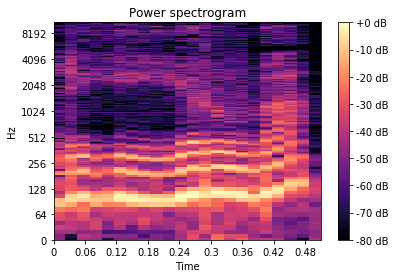

In [10]:
k = 7
exampleSpectrogram = dataset[0][k]
# print(exampleSpectrogram)
exampleLabel = dataset[1][k]
print(exampleLabel)
fig, ax = plt.subplots()
img = librosa.display.specshow(librosa.amplitude_to_db(exampleSpectrogram,
                                                       ref=np.max),
                               y_axis='log', x_axis='time', ax=ax)
ax.set_title('Power spectrogram')
fig.colorbar(img, ax=ax, format="%+2.0f dB")

sm


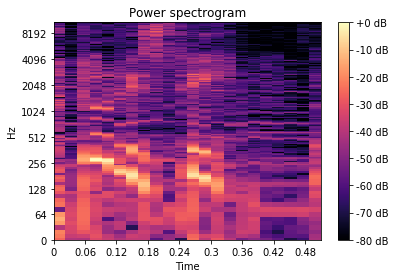

In [11]:
k = 1
exampleSpectrogram = dataset[0][k]
# print(exampleSpectrogram)
exampleLabel = dataset[1][k]
print(exampleLabel)
fig, ax = plt.subplots()
img = librosa.display.specshow(librosa.amplitude_to_db(exampleSpectrogram,
                                                       ref=np.max),
                               y_axis='log', x_axis='time', ax=ax)
ax.set_title('Power spectrogram')
fig.colorbar(img, ax=ax, format="%+2.0f dB")

In [3]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate
from sklearn.metrics import accuracy_score, f1_score, balanced_accuracy_score
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import Lasso
from sklearn import svm
from sklearn import tree

In [4]:
data = np.stack(dataset[0])
labels = np.stack(dataset[1])
trainX, testX, trainY, testY = train_test_split(data, labels, test_size = 0.2, random_state=42, stratify=labels)

In [9]:
ks = np.arange(1,50,1)
trainAccuracies = []
trainBalancedAccuracies = []
trainMacroF1s = []
testAccuracies = []
testBalancedAccuracies = []
testMacroF1s = []
for k in tqdm(ks):
    knnClf = KNeighborsClassifier(n_neighbors=k)
    knnClf.fit(trainX.astype('float32').reshape(-1, 1025*22), trainY)
    trainPreds = knnClf.predict(trainX.astype('float32').reshape(-1, 1025*22))
    testPreds = knnClf.predict(testX.astype('float32').reshape(-1, 1025*22))
    trainAccuracies.append(accuracy_score(y_true=trainY, y_pred=trainPreds))
    trainBalancedAccuracies.append(balanced_accuracy_score(y_true=trainY, y_pred=trainPreds))
    trainMacroF1s.append(f1_score(y_true=trainY, y_pred=trainPreds, average='macro'))
    testAccuracies.append(accuracy_score(y_true=testY, y_pred=testPreds))
    testBalancedAccuracies.append(balanced_accuracy_score(y_true=testY, y_pred=testPreds))
    testMacroF1s.append(f1_score(y_true=testY, y_pred=testPreds, average='macro'))

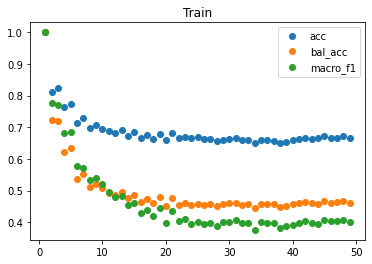

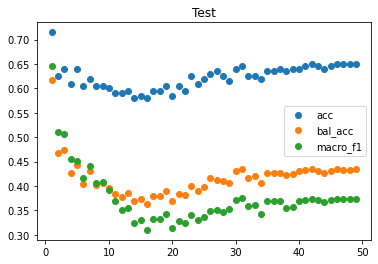

In [10]:
plt.plot(ks, trainAccuracies, 'o')
plt.plot(ks, trainBalancedAccuracies, 'o')
plt.plot(ks, trainMacroF1s, 'o')
plt.legend(['acc','bal_acc','macro_f1'])
plt.title('Train')
plt.show()
plt.plot(ks, testAccuracies, 'o')
plt.plot(ks, testBalancedAccuracies, 'o')
plt.plot(ks, testMacroF1s, 'o')
plt.legend(['acc','bal_acc','macro_f1'])
plt.title('Test')
plt.show()

In [11]:
# depths = np.arange(5,31,5)
# trainAccuracies = []
# trainBalancedAccuracies = []
# trainMacroF1s = []
# testAccuracies = []
# testBalancedAccuracies = []
# testMacroF1s = []
# for depth in tqdm(depths) : 
#     adaClf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=depth), random_state=0, learning_rate=0.5, n_estimators=50)
#     adaClf.fit(trainX.astype('float32').reshape(-1,1025*22), trainY)
#     trainPreds = adaClf.predict(trainX.astype('float32').reshape(-1,1025*22))
#     testPreds = adaClf.predict(testX.astype('float32').reshape(-1,1025*22))
#     trainAccuracies.append(accuracy_score(y_true=trainY, y_pred=trainPreds))
#     trainBalancedAccuracies.append(balanced_accuracy_score(y_true=trainY, y_pred=trainPreds))
#     trainMacroF1s.append(f1_score(y_true=trainY, y_pred=trainPreds, average='macro'))
#     testAccuracies.append(accuracy_score(y_true=testY, y_pred=testPreds))
#     testBalancedAccuracies.append(balanced_accuracy_score(y_true=testY, y_pred=testPreds))
#     testMacroF1s.append(f1_score(y_true=testY, y_pred=testPreds, average='macro'))

In [12]:
# plt.plot(depths, trainAccuracies, 'o')
# plt.plot(depths, trainBalancedAccuracies, 'o')
# plt.plot(depths, trainMacroF1s, 'o')
# plt.legend(['acc','bal_acc','macro_f1'])
# plt.title('Train')
# plt.show()
# plt.plot(depths, testAccuracies, 'o')
# plt.plot(depths, testBalancedAccuracies, 'o')
# plt.plot(depths, testMacroF1s, 'o')
# plt.legend(['acc','bal_acc','macro_f1'])
# plt.title('Test')
# plt.show()

In [5]:
depths = np.arange(5,101,5)
trainAccuracies = []
trainBalancedAccuracies = []
trainMacroF1s = []
testAccuracies = []
testBalancedAccuracies = []
testMacroF1s = []
for depth in tqdm(depths) : 
    rfClf = RandomForestClassifier(max_depth=depth, random_state=0)
    rfClf.fit(trainX.astype('float32').reshape(-1,1025*22), trainY)
    trainPreds = rfClf.predict(trainX.astype('float32').reshape(-1,1025*22))
    testPreds = rfClf.predict(testX.astype('float32').reshape(-1,1025*22))
    trainAccuracies.append(accuracy_score(y_true=trainY, y_pred=trainPreds))
    trainBalancedAccuracies.append(balanced_accuracy_score(y_true=trainY, y_pred=trainPreds))
    trainMacroF1s.append(f1_score(y_true=trainY, y_pred=trainPreds, average='macro'))
    testAccuracies.append(accuracy_score(y_true=testY, y_pred=testPreds))
    testBalancedAccuracies.append(balanced_accuracy_score(y_true=testY, y_pred=testPreds))
    testMacroF1s.append(f1_score(y_true=testY, y_pred=testPreds, average='macro'))

  0%|          | 0/20 [00:00<?, ?it/s]

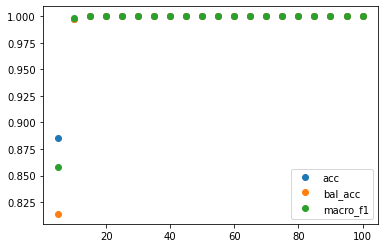

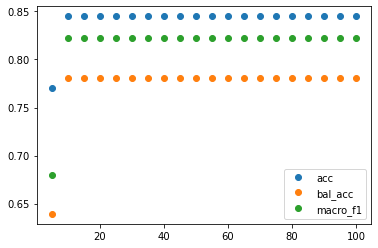

In [11]:
plt.plot(depths, trainAccuracies, 'o')
plt.plot(depths, trainBalancedAccuracies, 'o')
plt.plot(depths, trainMacroF1s, 'o')
plt.legend(['acc','bal_acc','macro_f1'])
plt.show()
plt.plot(depths, testAccuracies, 'o')
plt.plot(depths, testBalancedAccuracies, 'o')
plt.plot(depths, testMacroF1s, 'o')
plt.legend(['acc','bal_acc','macro_f1'])
plt.show()

In [45]:
depths = np.arange(5,101,5)
trainAccuracies = []
trainBalancedAccuracies = []
trainMacroF1s = []
testAccuracies = []
testBalancedAccuracies = []
testMacroF1s = []
for depth in tqdm(depths): 
    treeClf = DecisionTreeClassifier(random_state=420, max_depth=depth)
    treeClf.fit(trainX.reshape(-1, 1025*22), trainY)
    trainPreds = treeClf.predict(trainX.reshape(-1, 1025*22))
    testPreds = treeClf.predict(testX.reshape(-1, 1025*22))
    trainAccuracies.append(accuracy_score(y_true=trainY, y_pred=trainPreds))
    trainBalancedAccuracies.append(balanced_accuracy_score(y_true=trainY, y_pred=trainPreds))
    trainMacroF1s.append(f1_score(y_true=trainY, y_pred=trainPreds, average='macro'))
    testAccuracies.append(accuracy_score(y_true=testY, y_pred=testPreds))
    testBalancedAccuracies.append(balanced_accuracy_score(y_true=testY, y_pred=testPreds))
    testMacroF1s.append(f1_score(y_true=testY, y_pred=testPreds, average='macro'))

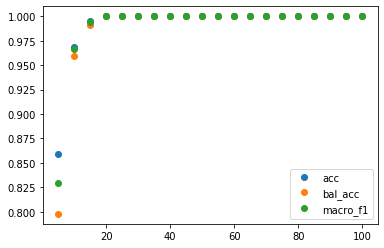

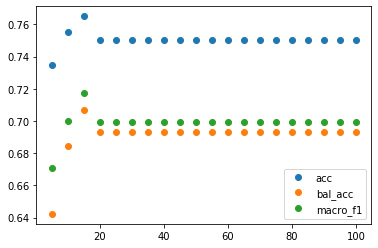

In [46]:
plt.plot(depths, trainAccuracies, 'o')
plt.plot(depths, trainBalancedAccuracies, 'o')
plt.plot(depths, trainMacroF1s, 'o')
plt.legend(['acc','bal_acc','macro_f1'])
plt.show()
plt.plot(depths, testAccuracies, 'o')
plt.plot(depths, testBalancedAccuracies, 'o')
plt.plot(depths, testMacroF1s, 'o')
plt.legend(['acc','bal_acc','macro_f1'])
plt.show()

fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(treeClf, filled=True, max_depth=5)
plt.savefig('tree.pdf')

# Training HMM

In [6]:
from sklearn.preprocessing import LabelEncoder
from pomegranate import HiddenMarkovModel
from pomegranate.distributions import DiscreteDistribution
import pomegranate as pg

In [7]:
with open('../dataset/HMM-dataset-train.pickle', 'rb') as f:
    train_dataset = pickle.load(f)
    
with open('../dataset/HMM-dataset-test.pickle', 'rb') as f:
    test_dataset = pickle.load(f)

In [8]:
train_X = np.concatenate([np.stack(train_dataset[0]).reshape(-1, 1025*22)])

train_y = np.concatenate([np.stack(train_dataset[1])])

test_X = np.stack(test_dataset[0]).reshape(-1, 1025*22)
test_y = np.stack(test_dataset[1])

In [9]:
del train_dataset
del test_dataset

In [10]:
class smoothHMM:

    def __init__(self, predictor, state_names):

        self.predictor = predictor
        self.modelHMM = HiddenMarkovModel()
        self.le=LabelEncoder()
        self.state_names = state_names

    def fit(self, X, y):
        
        X_prediction=self.predictor.predict(X)
        for i in range(len(X_prediction)):
            if X_prediction[i]=='pc' or X_prediction[i]=='sm':
                X_prediction[i]='s'
        X_simplified = self.le.fit_transform(X_prediction).reshape(1, -1)
        
        print(np.unique(X_simplified))
        for i in range(len(y)):
            if y[i]=='pc' or y[i]=='sm':
                y[i]='s'
            if y[i]=='j':
                y[i]='m'
                
        y = y.reshape(1, -1)

        
        print(np.unique(y))
        
        self.modelHMM = self.modelHMM.from_samples(DiscreteDistribution, 2, X_simplified, labels = y,
                                   algorithm='labeled', state_names=['m','s'], verbose = True)
        self.modelHMM.bake()
           

    def predict(self, X):
        X_prediction=self.predictor.predict(X)
        for i in range(len(X_prediction)):
            if X_prediction[i]=='pc' or X_prediction[i]=='sm':
                X_prediction[i]='s'
        X_simplified = self.le.transform(X_prediction).tolist()
        
        return self.modelHMM.predict(X_simplified)
    
    def score(self, X, y):
        
        target = self.predict(X)
        
        for i in range(len(y)):
            if y[i]=='pc' or y[i]=='sm':
                y[i]='s'
            if y[i]=='j':
                y[i]='m'
                
        y = self.le.transform(y)
        
        return np.sum(target==y)/y.shape[0]

In [11]:
print(train_X.shape)

(19620, 22550)


In [12]:
print(train_y.shape)

(19620,)


In [13]:
hmm = smoothHMM(rfClf, state_names=['m', 'pc', 's', 'sm'])
hmm.fit(train_X, train_y)

[0 1]
['m' 's']
[1] Improvement: 8348.511850136256	Time (s): 0.03228
[2] Improvement: 0.0	Time (s): 0.03153
Total Training Improvement: 8348.511850136256
Total Training Time (s): 0.1000


In [14]:
hmm.score(test_X, test_y)

0.8685900703435621